# メディア工学　A1678211　Takumi Nishizawa 

ニューラルネットワークの実装を行う。

1.ニューロンの初期化
2.重みの初期化
3.活性化関数
4.学習を行うメソッド
5.評価用メソッド

これらを内包したクラスである

In [2]:
import numpy as np
class neuralNetwork:
    def __init__(self,input_neurons,hidden_neurons,output_neurons,learning_rate):
        #入力層、隠れ層、出力層のニューロン数をインスタンス変数に代入
        self.inneurons = input_neurons #入力層のニューロン数
        self.hneurons = hidden_neurons #隠れ層のニューロン数
        self.oneurons = output_neurons #出力層のニューロン数
        #学習率をインスタンス変数に代入
        self.lr = learning_rate
        #weight_initialize()を呼ぶ
        self.weight_initialize()

    #重みの初期化を行う
    def weight_initialize(self):
        #入力層と隠れ層の間のリンクの重みの初期値を設定
        self.w_h = np.random.normal(0.0,pow(self.inneurons,-0.5),(self.hneurons,self.inneurons + 1))
        #平均は０、標準偏差、隠れ層のニューロン数を行数、バイアスを加え列数とする
        self.w_o = np.random.normal(0.0,pow(self.hneurons,-0.5),(self.oneurons,self.hneurons + 1))
        #平均は０、標準偏差、出力層のニューロン数を行数、隠れ層のニューロン数にバイアスを加え列数とする
    
    #シグモイド関数を活性化関数として定義
    def activation_function(self,x):
        return 1 / (1  + np.exp(-x))
    
    #ニューラルネットワークの学習を行うメソッド
    def train(self,inputs_list,targets_list):
        #入力値の配列、目標出力の配列
        #入力値の配列にバイアス項を追加して1列の行列に変換
        inputs = np.array(np.append(inputs_list,[[1]]),ndmin = 2).T
        #配列の末尾にバイアスのための値[1]を追加、2次元化、転置して1列の行列にする

        #目標値の配列を1列の行列に変換する
        targets = np.array(targets_list,ndmin = 2).T
        #目標値の配列、2次元化、転置して1列の行列にする

        #隠れ層への入力信号を計算
        hidden_inputs = np.dot(self.w_h,inputs)
        #入力層と隠れ層の間の重み、入力値の行列

        #活性化関数を適用して隠れ層から出力する
        hidden_outputs = self.activation_function(hidden_inputs)

        #隠れ層の出力行列の末尾にバイアスの値として１を追加
        hidden_outputs = np.append(hidden_outputs,[[1]],axis = 0)
        #隠れ層の出力行列、2次元形式でバイアス値を追加、行を指定（列は1）

        #出力層への入力信号を計算
        final_inputs = np.dot(self.w_o,hidden_outputs)
        #隠れ層と出力層の間の重み、隠れ層の出力

        #活性化関数を適用して出力層から出力する
        final_outputs = self.activation_function(final_inputs)
        
        #目標値と出力層の出力信号の誤差を求める
        output_errors = targets - final_outputs
        #誤差逆伝播により隠れ層の誤差を求める
        hidden_errors = np.dot(self.w_o.T,output_errors)
        #隠れ層と出力層の間の重み行列を転置する、出力値と目標値との誤差

        #隠れ層と出力層の間の重みの更新
        self.w_o += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)),np.transpose(hidden_outputs))
        #出力誤差*出力信号*(1-出力信号)、出力信号の行列を転置

        #隠れ層の出力エラーからバイアスのものを取り除く
        hidden_errors_nobias = np.delete(hidden_errors,self.hneurons,axis = 0)
        #隠れ層の出力エラーの行列、バイアスを除くニューロン数をインデックスにする、行の削除を指定

        #隠れ層の出力からバイアスを取り除く
        hidden_outputs_nobias = np.delete(hidden_outputs,self.hneurons,axis = 0)
        #隠れ層の出力の行列、バイアスを除くニューロン数をインデックスにする、行の削除を指定

        #入力層と隠れ層の間の重みを更新
        self.w_h += self.lr * np.dot((hidden_errors_nobias * hidden_outputs_nobias * (1.0-hidden_outputs_nobias)),np.transpose(inputs))
        #隠れ層の出力誤差*隠れ層の出力*(1-隠れ層の出力)、入力層の出力信号の行列を転置
    #学習結果を基にテストデータを評価するメソッド
    def evaluate(self,inputs_list):
        #テスト用データの配列
        #テスト用データの配列を一列の行列に変換する
        inputs = np.array(np.append(inputs_list,[1]),ndmin = 2).T
        #配列の末尾にバイアスの値[1]を追加、2次元化、転置して1列の行列にする

        #隠れ層への入力信号を計算
        hidden_inputs = np.dot(self.w_h,inputs)
        #入力層と隠れ層の間の重み、テストデータの行列

        #活性化関数を適用して隠れ層から出力する
        hidden_outputs = self.activation_function(hidden_inputs)

        #出力層への入力信号を計算
        final_inputs = np.dot(self.w_o,np.append(hidden_outputs,[1]),)
        #隠れ層と出力層の間の重み、隠れ層の出力配列の末尾にバイアスの値[1]を追加

        #活性化関数を適用して出力層から出力する
        final_outputs = self.activation_function(final_inputs)

        #出力層からの出力を戻り値として返す
        return final_outputs

Kerasからmnistデータをインプットする

(x_trains,y_trains),(x_tests,y_tests)に分けてインプットし、

学習ではtrainsを、精度を確かめる際にはtestsを用いる

In [3]:
from keras.datasets import mnist
(x_trains,y_trains),(x_tests,y_tests) = mnist.load_data()

Using TensorFlow backend.


データが入っているかどうかをplotすることで確認する


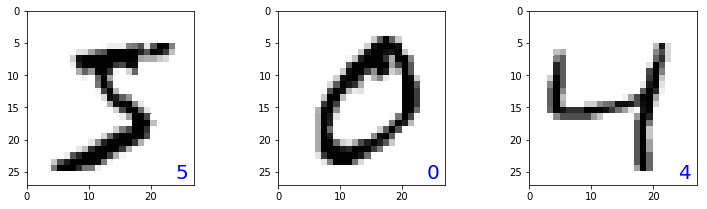

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1,figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1,3,id+1)
    #784個のRGB値を28*28の行列にする
    img = x_trains[id, :, :].reshape(28,28)
    #色相を反転させてプロットする
    plt.pcolor(255 - img)
    #画像の正解値をプロット
    plt.text(24,26,"%d" %y_trains[id],color='blue',fontsize = 20)
    plt.xlim(0,27) #x軸を0~28の範囲
    plt.ylim(27,0) #y軸を28~0の範囲
plt.show()

①60,000×28×28から60,000×784に配列の形を整える

②データをカラー値から0~1の範囲にし、0のデータを0.01に押し上げる


In [5]:
#60000*28*28の2次元配列を60000*784の行列に変換
x_trains = x_trains.reshape(60000,784)
#データを255で割って0.99をかけた後、0.01を加えてシフトする
x_trains = (x_trains / 255.0 * 0.99) + 0.01

学習回数5回で学習させる

入力層のニューロン数：784個

隠れ層のニューロン数：200個

出力層のニューロン数：10個

学習率：0.1

以上の条件でニューラルネット学習させる

In [6]:
import time

#学習を使って結果を出力
start = time.time()    #プログラムの開始時刻を取得
input_neurons = 784    #入力層のニューロンの数
hidden_neurons = 200   #隠れ層のニューロンの数
output_neurons = 10    #出力層のニューロンの数
learning_rate = 0.1    #学習率

#neuralNetworkオブジェクトの生成
n = neuralNetwork(input_neurons,hidden_neurons,output_neurons,learning_rate)
#ニューラルネットワークの学習
#学習を繰り返す回数
epochs = 5

#指定した回数だけ学習を繰り返す
for e in range(epochs):
    #画像データと正解ラベルを順番に取り出してネットワークに入力
    for (inputs,target) in zip(x_trains,y_trains):
        #出力層のニューロン数に合わせて目標配列を作成
        targets = np.zeros(output_neurons) + 0.01
        #正解数に対応する要素を0.99に
        targets[int(target)] = 0.99
        #学習を実行
        n.train(inputs,  #訓練データの行列
                targets  #目標値の行列
               )

print('done')  #処理が終了したら'done'と出力
#処理にかかった時間を出力
print("Computation time:{0:.3f} sec".format(time.time()-start))

done
Computation time:941.841 sec


視覚的にどれだけ正確に表せているかを出力する

もし学習データと予測データが一致していたら□を、間違っていたら■を出力するように設定

In [7]:
#ニューラルネットワークのテスト
#10000*28*28の2次元配列を60000*784の行列に変換
x_tests = x_tests.reshape(10000,784)
#データを255で割って0.99をかけた後、0.01を加えてシフトする
x_tests = (x_tests / 255.0 * 0.99) + 0.01

#正解は1,不正解は0を格納する配列
score = []

#x_testsをinputs,y_testsをcorrect_labelに格納
for(inputs,
   correct_label) in zip(x_tests,
                        y_tests):
    #ニューラルネットワークで評価する
    outputs = n.evaluate(inputs)
    #出力層のニューロン数に合わせて正解の配列を作成
    targets = np.zeros(output_neurons) + 0.01
    #正解値に対応する要素を0.99にする
    targets[int(target)] = 0.99
    #出力の行列の最大値のインデックスが予測する手書き数字に対応
    label = np.argmax(outputs)
    #ネットワークの出力と正解ラベルを比較
    if(label == correct_label):
        #正解ならばscoreに1を追加
        score.append(1)
    else:
        #不正解なら0を追加
        score.append(0)
        

In [8]:
#scoreに記録された正誤記録を出力
result = ['□' if i == 1 else '■' for i in score]
print(result)

['□', '□', '□', '□', '□', '□', '□', '□', '■', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '■', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□', '□',

実際に正解率を見てみよう

In [9]:
#正解率を求める
#配列scoreをNumpy配列に変換
score_arry = np.asarray(score)
#score_arryの合計をscore_arryの要素数で割って正解率を求める
print("performance = ",
     score_arry.sum() / score_arry.size)

performance =  0.9726


# kerasを用いてニューラルネットワークを実装してみる。


先ほどまではライブラリに頼らずにニューラルネットワークを構築したが、kerasを用いることでさらに楽に表すことができる

In [10]:
#MNISTデータセットの読み込みと加工
import numpy as np
#keras.utilsからnp_utilsをインポート
from keras.utils import np_utils
# MNISTデータセットをインポート
from keras.datasets import mnist

# MNISTデータセットの読み込み
(x_train,y_train),(x_tests,y_tests) = mnist.load_data()

#訓練データ
#60000*28*28の3次元配列を60000*784の二次元配列に変換
x_train = x_train.reshape(60000,784)
#訓練データをfloat32(浮動小数点数)型に変換
x_train = x_train.astype('float32')
#データを255で割って0から1.0の範囲に変換
x_train /= 255
#正解ラベルの数
correct = 10
#正解ラベルを1-of-K符号化法で変換
y_train = np_utils.to_categorical(y_train,correct)

#テストデータ
#10000*28*28の3次元配列を10000*784の二次元配列に変換
x_tests = x_tests.reshape(10000,784)
#テストデータをfloat32(浮動小数点数)型に変換
x_tests = x_tests.astype('float32')
#データを255で割って0から1.0の範囲に変換
x_tests /= 255
#正解ラベルを1-of-K符号化法で変換
y_tests = np_utils.to_categorical(y_tests,correct)

先ほどのニューラルネットワークとは異なり、損失の基準に交差エントロピー誤差を用いて、最適化の学習方法としてAdam(Adaptive moment estimation)を用いた

In [11]:
#ニューラルネットワークの構築　by Keras
#keras.modelsからSequentialをインポート
from keras.models import Sequential
#keras.layersからDense,Activationをインポート
from keras.layers import Dense,Activation
#keras.optimizersからAdamをインポート
from keras.optimizers import Adam

#ニューラルネットワークのインスタンス化
model = Sequential()
model.add(Dense(200,#隠れ層のニューロン数は200
               input_dim=784,#入力層のニューロン数は784
               activation='relu'#活性化関数はReLU
               ))
model.add(Dense(10,#出力層のニューロン数は10
               activation='sigmoid'#活性化関数はsigmoid
               ))
model.compile(
    loss='categorical_crossentropy',#損失の基準は交差エントロピー誤差
    optimizer=Adam(),#学習方法をAdamとする
    metrics=['accuracy']#学習評価として正解率を指定
    )

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [13]:
#学習を行って、結果を出力　by keras
import time

startTime = time.time()
#fit()メソッドは戻り値として学習過程の情報を返す
history = model.fit(x_train,#訓練データ
                    y_train,#正解ラベル
                    epochs=5,#学習を繰り替えす回数
                    batch_size=100,#ミニバッチとして用いるサンプル数
                    verbose = 1,#学習の進捗状況を出力する
                    validation_data=(
                        x_tests, y_tests#テストデータの指定
                    )
                    )
#テストデータで学習を評価するデータを取得
score = model.evaluate(x_tests,y_tests,verbose=0)
#テストデータの誤り率を出力
print('Test loss:',score[0])
#テストデータの正解率を出力
print('Test Accuracy:',score[1])
#処理にかかった時間を出力
print("Time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.3298 - acc: 0.9115 - val_loss: 0.1829 - val_acc: 0.9466
Epoch 2/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.1422 - acc: 0.9592 - val_loss: 0.1183 - val_acc: 0.9650
Epoch 3/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0993 - acc: 0.9713 - val_loss: 0.1030 - val_acc: 0.9705
Epoch 4/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.0739 - acc: 0.9780 - val_loss: 0.0830 - val_acc: 0.9739
Epoch 5/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.0598 - acc: 0.9823 - val_loss: 0.0782 - val_acc: 0.9762
Test loss: 0.0781668165792
Test Accuracy: 0.9762
Time:18.612 sec


この学習がうまくいっているかどうか見るために、損失と正解率をグラフにして表す

横軸はepoch（学習回数）で縦軸は損失、または正解率である

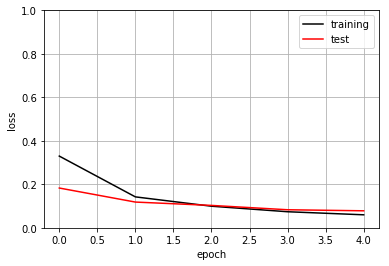

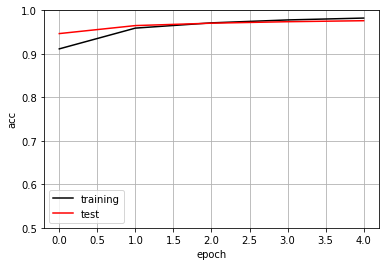

In [14]:
#損失、正解率をグラフにする
import numpy as np
import matplotlib.pyplot as plt

#訓練データの損失（誤り率）をプロット
plt.plot(history.history['loss'],
        label='training',
        color='black')
#テストデータの損失（誤り率）をプロット
plt.plot(history.history['val_loss'],
        label='test',
        color='red')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#訓練データの正解率をプロット
plt.plot(history.history['acc'],
        label='training',
        color='black')
#テストデータの正解率をプロット
plt.plot(history.history['val_acc'],
        label='test',
        color='red')
plt.ylim(0.5,1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

# ディープラーニングを用いて、より正確にしてみよう

ここからは大学の貸与PCではなく、高速なGPUの入ったPCで試してみよう。

もちろん大学のノートPCでもできなくはないが最後の処理に約1時間かかる恐れがあるためその時間に耐えられる人だけやってみよう

In [15]:
#2次元フィルタ
#訓練データの用意
import numpy as np

#keras.utilsからnp_utilsをインポート
from keras.utils import np_utils
#MNISTデータセットをインポート
from keras.datasets import mnist

#MNISTデータセットの読み込み
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#訓練データ
#60000*28*28の3次元配列を60000*28*28*1の4次元配列に変換
x_train = x_train.reshape(60000,28,28,1)
#訓練データをfloat32（浮動小数点数）型に変換
x_train = x_train.astype('float32')
#データを255で割って0~1.0の範囲に変換
x_train /= 255


In [16]:
#フィルタの適用
import matplotlib.pyplot as plt

#フィルタを適用する画像のインデックス
img_id = 42

#縦方向のエッジを検出するフィルタ
vertical_edge_fil = np.array([[-2,1,1],
                              [-2,1,1],
                              [-2,1,1]
                             ],dtype=float)

#横方向のエッジを検出するフィルタ
horizontal_edge_fil = np.array([[1,1,1],
                              [1,1,1],
                              [-2,-2,-2]
                             ],dtype=float)
#画像のピクセル値を取得
img_x = x_train[img_id,:,:,0]
img_height = 28 #画像の縦サイズ
img_width = 28 #画像の横サイズ
#画像のデータを28*28の行列に変換
img_x = img_x.reshape(img_height,img_width)
#縦エッジのフィルタ適用後の値を代入する行列を用意
vertical_edge = np.zeros_like(img_x)
#横エッジのフィルタ適用後の値を代入する行列を用意
horizontal_edge = np.zeros_like(img_x)

#3×3のフィルタを適用
for h in range(img_height - 3):
    for w in range(img_width - 3):
        #フィルタを適用する領域を取得
        img_region = img_x[h:h+3,w:w+3]
        #縦エッジのフィルタを適用
        vertical_edge[h+1,w+1] = np.dot(
            #画像のピクセル値を1次元の配列に変換
            img_region.reshape(-1),
            #縦エッジのフィルタを1次元の配列に変換
            vertical_edge_fil.reshape(-1)
        )        
        #横エッジのフィルタを適用
        horizontal_edge[h+1,w+1] = np.dot(
            #画像のピクセル値を1次元の配列に変換
            img_region.reshape(-1),
            #縦エッジのフィルタを1次元の配列に変換
            horizontal_edge_fil.reshape(-1)
        )

In [17]:
#プーリング、ドロップアウトを兼ね備えた深層畳み込みニューラルネットワーク
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import Adam

model = Sequential()

#第1層：畳み込み層
model.add(Conv2D(filters=16,#フィルタの数は16
                kernel_size=(3,3),#3×3のフィルタを使用
                input_shape=(28,28,1),#入力データのサイズ
                padding='same',#ゼロパディングを行う
                activation='relu'#活性化関数はReLU
                ))
#第2層：畳み込み層
model.add(Conv2D(filters=32,#フィルタの数は16
                kernel_size=(3,3),#3×3のフィルタを使用
                padding='same',#ゼロパディングを行う
                activation='relu'#活性化関数はReLU
                ))
#第3層：プーリング層
model.add(
    MaxPooling2D(pool_size=(2,2))#縮小対象の領域は2×2
         )
#第4層：畳み込み層
model.add(Conv2D(filters=64,#フィルタの数は16
                kernel_size=(3,3),#3×3のフィルタを使用
                padding='same',#ゼロパディングを行う
                activation='relu'#活性化関数はReLU
                ))
#第5層：プーリング層
model.add(
    MaxPooling2D(pool_size=(2,2))#縮小対象の領域は2×2
         )
#ドロップアウト層
model.add(Dropout(0.5))#ドロップアウトは50%
#出力層への入力を4次元配から2次元に変換する
model.add(Flatten())

#第6層：全結合層
model.add(Dense(128,
               activation='relu'
               ))
model.add(Dropout(0.5))#ドロップアウトは25%

#第7層：出力層
model.add(Dense(10,#出力層のニューロン数は10
               activation='softmax'#活性化関数はsoftmax関数
               ))

#Sequentialオブジェクトのコンパイル
model.compile(
loss = 'categorical_crossentropy',#損失基準は交差エントロピー誤差
optimizer=Adam(),#学習方法をAdamにする
metrics=['accuracy']#学習評価として正解率を測定
)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________

In [18]:
#MNISTデータセットの読み込みと加工
import numpy as np
#keras.utilsからnp_utilsをインポート
from keras.utils import np_utils
# MNISTデータセットをインポート
from keras.datasets import mnist

# MNISTデータセットの読み込み
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#訓練データ
#60000*28*28の3次元配列を60000*28*28*1の4次元配列に変換
x_train = x_train.reshape(60000,28,28,1)
#訓練データをfloat32(浮動小数点数)型に変換
x_train = x_train.astype('float32')
#データを255で割って0から1.0の範囲に変換
x_train /= 255
#正解ラベルの数
correct = 10
#正解ラベルを1-of-K符号化法で変換
y_train = np_utils.to_categorical(y_train,correct)

#テストデータ
#10000*28*28の3次元配列を10000*28*28*1の4次元配列に変換
x_test = x_test.reshape(10000,28,28,1)
#テストデータをfloat32(浮動小数点数)型に変換
x_test = x_test.astype('float32')
#データを255で割って0から1.0の範囲に変換
x_test /= 255
#正解ラベルを1-of-K符号化法で変換
y_test = np_utils.to_categorical(y_test,correct)


In [19]:
#深層学習を行う
import time

#学習を行って結果を出力
start = time.time()#プログラムの学習開始時刻を取得

history = model.fit(x_train,#訓練データ
                   y_train,#正解ラベル
                   batch_size = 100,#勾配計算に用いるミニバッチの数
                   epochs = 20,#学習を繰り返す回数
                   verbose = 1,#学習の進捗状況を出力する
                   validation_data = (
                       x_test,y_test#テストデータの指定
                   )
                   )

#テストデータを使って学習を評価するデータを取得
score = model.evaluate(x_test,y_test,verbose=0)
#テストデータの誤り率を出力
print('Test loss:',score[0])
#テストデータの正解率を出力
print('Test accuracy:',score[1])
#処理にかかった時間を出力
print("Computation time:{0:.3f} sec".format(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 195s 3ms/step - loss: 0.2749 - acc: 0.9147 - val_loss: 0.0538 - val_acc: 0.9825
Epoch 2/20
60000/60000 [==============================] - 197s 3ms/step - loss: 0.1032 - acc: 0.9690 - val_loss: 0.0365 - val_acc: 0.9870
Epoch 3/20
60000/60000 [==============================] - 191s 3ms/step - loss: 0.0791 - acc: 0.9762 - val_loss: 0.0308 - val_acc: 0.9893
Epoch 4/20
60000/60000 [==============================] - 203s 3ms/step - loss: 0.0666 - acc: 0.9791 - val_loss: 0.0257 - val_acc: 0.9919
Epoch 5/20
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0573 - acc: 0.9828 - val_loss: 0.0232 - val_acc: 0.9928
Epoch 6/20
60000/60000 [==============================] - 191s 3ms/step - loss: 0.0527 - acc: 0.9844 - val_loss: 0.0234 - val_acc: 0.9924
Epoch 7/20
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0468 - acc: 0.9854 - val_loss: 0.0226 - 